<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import sys
print("Python Version: " + sys.version)
print("Python Executable: " + sys.executable)

Python Version: 3.6.8 (v3.6.8:3c6b436a57, Dec 24 2018, 02:04:31) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]
Python Executable: /Users/alex/Documents/ai/handson-ml/_venv/bin/python3


In [2]:
%load_ext watermark
%watermark -v -p numpy,scipy,sklearn,pandas,matplotlib

CPython 3.6.8
IPython 7.2.0

numpy 1.16.0
scipy 1.2.0
sklearn 0.20.2
pandas 0.22.0
matplotlib 2.2.2


In [3]:
from functions import *      # 공통 함수들
default_config()      # matplotlib 폰트 & 한글 설정, 일관된 출력을 위해 유사난수 초기화(np.random.seed(42))

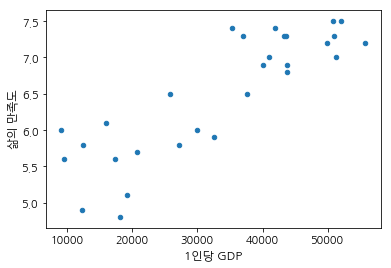

키프로스의 삶의 만족도: [[5.96242338]]


In [4]:
# 샘플 코드
import os, sys
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# 데이터 적재
datapath = os.path.join("../datasets", "lifesat", "")       # '../datasets/lifesat/'
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# 데이터 준비
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)      # functions.py에 정의된 함수
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# 데이터 시각화
ax = country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
ax.set(xlabel="1인당 GDP", ylabel="삶의 만족도")
plt.show()

# 선형 모델 선택
model = sklearn.linear_model.LinearRegression()

# 모델 훈련
model.fit(X, y)

# 키프로스에 대한 예측
X_new = [[22587]]  # 키프로스 1인당 GDP
print("키프로스의 삶의 만족도: " + str(model.predict(X_new))) # 결과 [[ 5.96242338]]

In [5]:
# 선형 회귀 모델을 k-최근접 이웃 회귀 모델로 교체할 경우
knn = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

# 모델 훈련
knn.fit(X, y)

# 키프로스에 대한 예측
print("키프로스의 삶의 만족도: " + str(knn.predict(X_new))) # 결과 [[ 5.76666667]]

키프로스의 삶의 만족도: [[5.76666667]]
